##Λουκία Παυλανά ΑΜ:031187##

<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [ ]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr>
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr>
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4>
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

###A.1 : Σύνθετες τοπολογιές####


In [ ]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

# create graphs
REG = nx.watts_strogatz_graph(n, d, 0, seedno)
RGER = nx.gnm_random_graph(n, M, seedno)
RGG = nx.random_geometric_graph(n, R, seed = seedno)
SF = nx.barabasi_albert_graph(n, d, seedno)
SW = nx.watts_strogatz_graph(n, d, p, seedno)

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

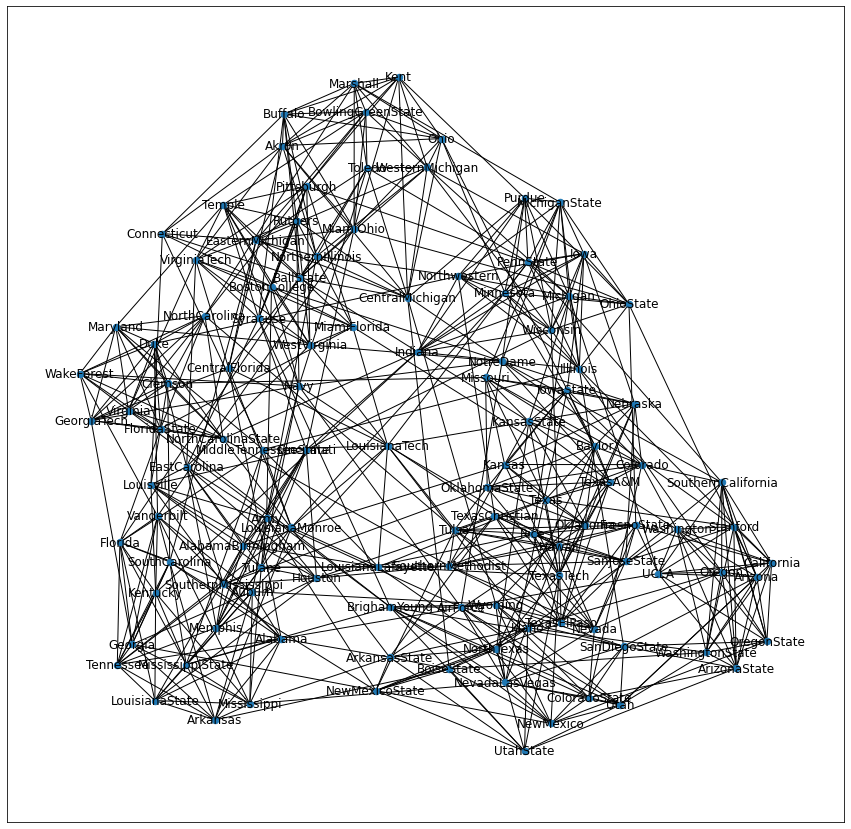

In [ ]:
#football network
football=nx.read_gml(r"football.gml")

plt.figure(figsize = (15, 15))
nx.draw_networkx(football, node_size = 42)

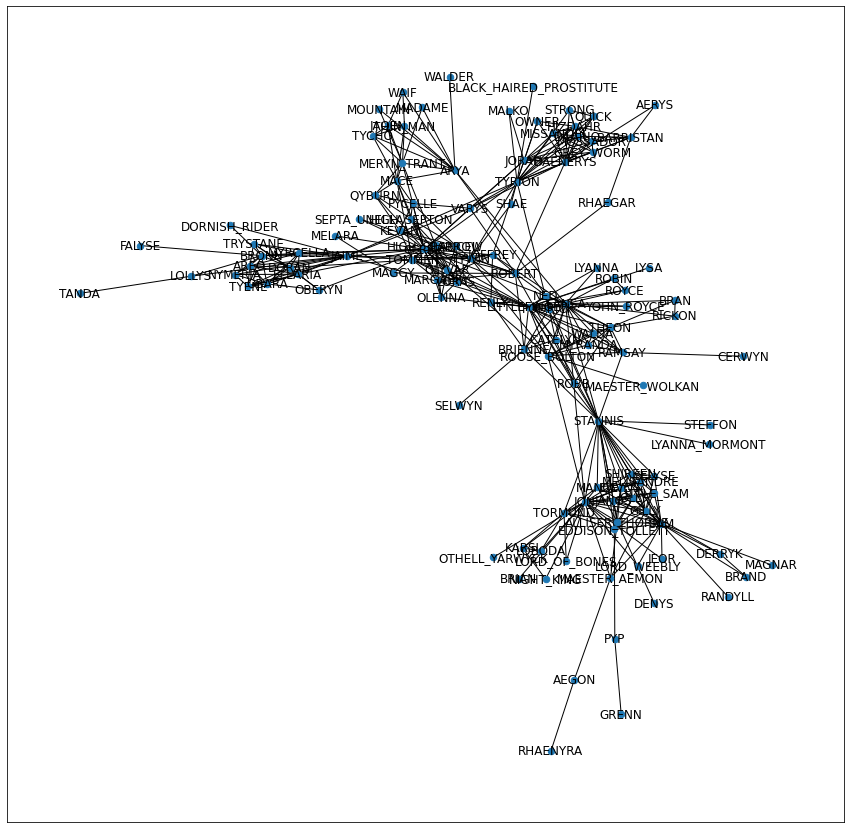

In [ ]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

plt.figure(figsize = (15, 15))
nx.draw_networkx(got, node_size = 42)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

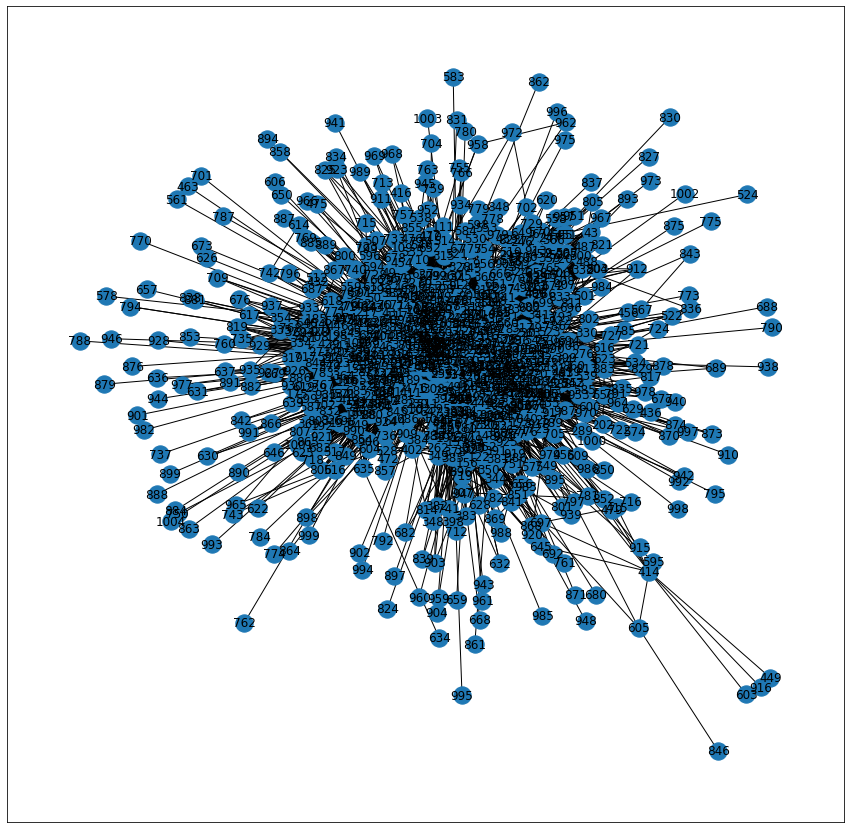

In [ ]:
#email-Eu-core network
eu = nx.read_edgelist("email-Eu-core.txt", create_using = nx.Graph())
# remove self loops using remove_edges_from
eu.remove_edges_from(nx.selfloop_edges(eu))
# largest connected component
largest_eu = max(nx.connected_components(eu), key = len)
# eu subgraph
eu_subgraph = eu.subgraph(largest_eu)
# visualize
plt.figure(figsize = (15, 15))
nx.draw_networkx(eu.subgraph(largest_eu))

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

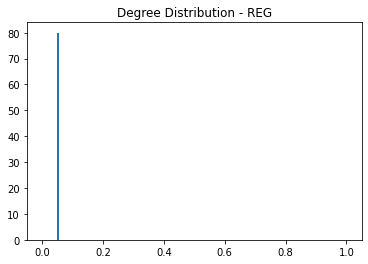

This graph is connected: True
Mean Node Degree for REG(Normalized): 0.05063291139240507
Mean Node Degree for REG: 4.0
Variance of Node Degree for REG(Normalized): 4.81482486096809e-35
Variance of Node Degree for REG: 0.0


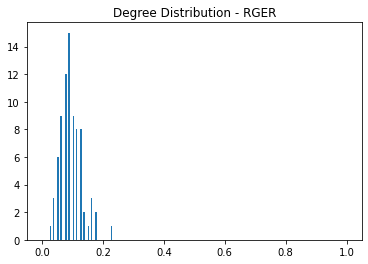

This graph is connected: True
Mean Node Degree for RGER(Normalized): 0.09493670886075949
Mean Node Degree for RGER: 7.5
Variance of Node Degree for RGER(Normalized): 0.001305880467873738
Variance of Node Degree for RGER: 8.15


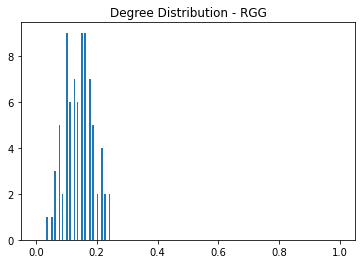

This graph is connected: True
Mean Node Degree for RGG(Normalized): 0.14240506329113925
Mean Node Degree for RGG: 11.25
Variance of Node Degree for RGG(Normalized): 0.002189152379426374
Variance of Node Degree for RGG: 13.6625


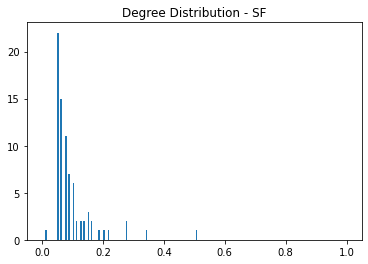

This graph is connected: True
Mean Node Degree for SF(Normalized): 0.09620253164556963
Mean Node Degree for SF: 7.6
Variance of Node Degree for SF(Normalized): 0.005350104149975965
Variance of Node Degree for SF: 33.39


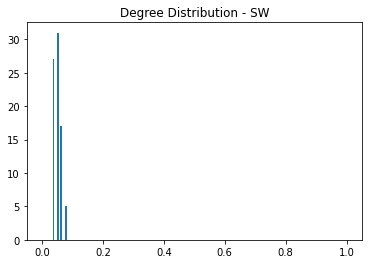

This graph is connected: True
Mean Node Degree for SW(Normalized): 0.05063291139240507
Mean Node Degree for SW: 4.0
Variance of Node Degree for SW(Normalized): 0.00012818458580355713
Variance of Node Degree for SW: 0.8


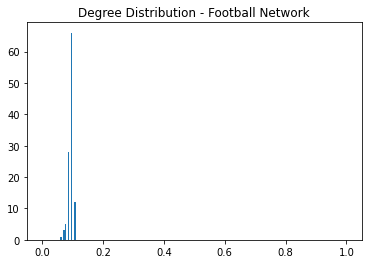

This graph is connected: True
Mean Node Degree for Football Network(Normalized): 0.0935163996948894
Mean Node Degree for Football Network: 10.660869565217391
Variance of Node Degree for Football Network(Normalized): 6.0067922600584965e-05
Variance of Node Degree for Football Network: 0.7806427221172025


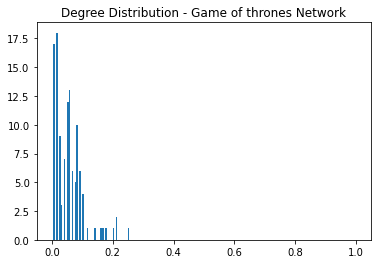

This graph is connected: True
Mean Node Degree for Game of thrones Network(Normalized): 0.05640222190571145
Mean Node Degree for Game of thrones Network: 6.65546218487395
Variance of Node Degree for Game of thrones Network(Normalized): 0.002229916756739365
Variance of Node Degree for Game of thrones Network: 31.049360920838932


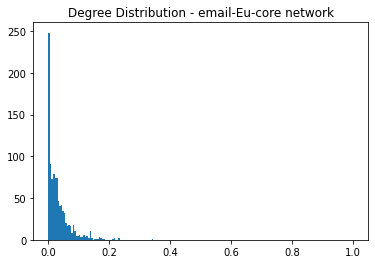

This graph is connected: False
Mean Node Degree for email-Eu-core network(Normalized): 0.03184079601990049
Mean Node Degree for email-Eu-core network: 31.9681592039801
Variance of Node Degree for email-Eu-core network(Normalized): 0.0013538115097187187
Variance of Node Degree for email-Eu-core network: 1364.6636627806245


In [ ]:
#Function gia to degree centrality
def find_degree(G):
    return dict(nx.degree_centrality(G))

#Function gia na vroume metrikes komvou
def degreeInfo(G, _name, _bins):
    # get degree list
    degree = find_degree(G)
    # create the figure, add title, show plot
    plt.figure()
    plt.title("Degree Distribution - " + _name)
    plt.hist(list(degree.values()), range = (0, 1), bins = _bins)
    plt.show()
    # print if graph is connected or not, mean node degree (normalized and not), variance of node degree (normalized and not)
    print("This graph is connected:", nx.is_connected(G))
    print("Mean Node Degree for " + _name + "(Normalized):", np.mean(np.array(list(degree.values()))))
    print("Mean Node Degree for " + _name + ":", np.mean(np.array(list(dict(nx.degree(G)).values()))))
    print("Variance of Node Degree for " + _name + "(Normalized):", np.var(np.array(list(dict(degree).values()))))
    print("Variance of Node Degree for " + _name + ":", np.var(np.array(list(dict(nx.degree(G)).values()))))


# create a list with all graphs
graph_pairs = [(REG, "REG"), (RGER, "RGER"), (RGG, "RGG"), (SF, "SF"), (SW, "SW"),
               (football,"Football Network"),(got,"Game of thrones Network"),(eu,"email-Eu-core network")]

#call degreeeInfo for all graphs
for (g, name) in graph_pairs:
  degreeInfo(g, name, 200)


<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

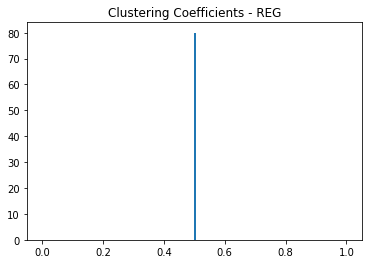

Avg Clustering Coefficient for REG(Normalized): 0.5
Var of Clustering Coefficients for REG(Normalized): 0.0


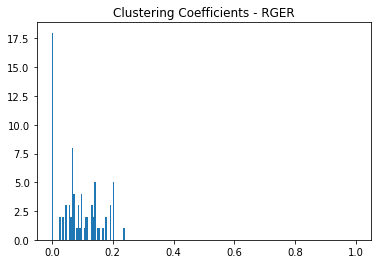

Avg Clustering Coefficient for RGER(Normalized): 0.08497775916893564
Var of Clustering Coefficients for RGER(Normalized): 0.004288874899085844


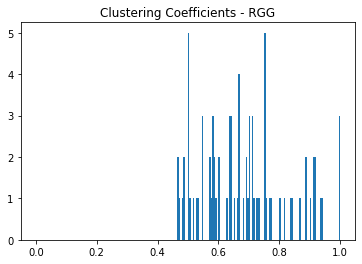

Avg Clustering Coefficient for RGG(Normalized): 0.6825788363897884
Var of Clustering Coefficients for RGG(Normalized): 0.020650408506201083


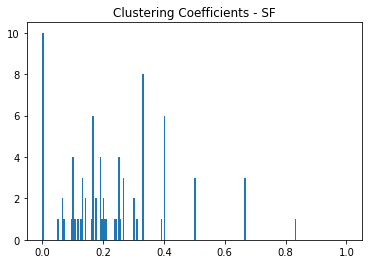

Avg Clustering Coefficient for SF(Normalized): 0.22922761606585143
Var of Clustering Coefficients for SF(Normalized): 0.02892890777065041


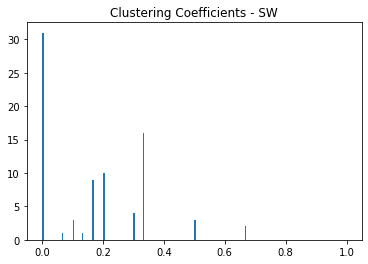

Avg Clustering Coefficient for SW(Normalized): 0.16708333333333333
Var of Clustering Coefficients for SW(Normalized): 0.028069270833333326


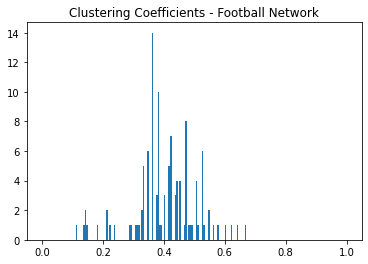

Avg Clustering Coefficient for Football Network(Normalized): 0.40321601104209814
Var of Clustering Coefficients for Football Network(Normalized): 0.010767498242611785


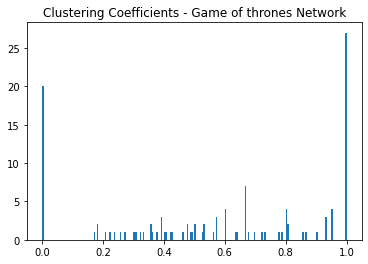

Avg Clustering Coefficient for Game of thrones Network(Normalized): 0.5744036387164706
Var of Clustering Coefficients for Game of thrones Network(Normalized): 0.12611105959324512


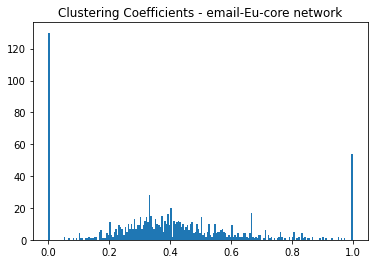

Avg Clustering Coefficient for email-Eu-core network(Normalized): 0.3993549664221539
Var of Clustering Coefficients for email-Eu-core network(Normalized): 0.06328530596234905


In [ ]:
# returns clustering coefficient of G and avg clustering coefficient of G
def cc_and_avgcc(G):
    return (nx.clustering(G), nx.average_clustering(G))

def ccInfo(G, _name, _bins):
    # get cc and avgcc for G
    (Gcc, Gavgcc) = cc_and_avgcc(G)
    # create the figure, add title, show plot
    plt.figure()
    plt.title("Clustering Coefficients - " + _name)
    plt.hist(list(Gcc.values()), range = (0, 1), bins = _bins)
    plt.show()
    # Convert Gcc dictionary to array (for std)
    Gcc_arr = np.array(list(Gcc.values()))
    # Print avg cc
    print("Avg Clustering Coefficient for " + _name + "(Normalized):", Gavgcc)
    # Print var
    print("Var of Clustering Coefficients for " + _name + "(Normalized):", np.var(Gcc_arr))

#call ccInfo for all graphs
for (g, name) in graph_pairs:
  ccInfo(g, name, 200)


<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

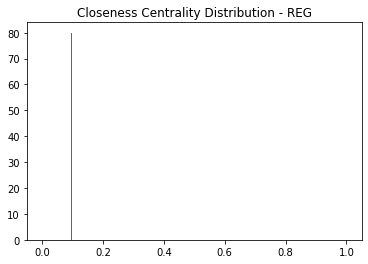

Mean Closeness Centrality for REG(Normalized): 0.09634146341463413
Variance of Closeness Centrality for REG(Normalized): 1.925929944387236e-34


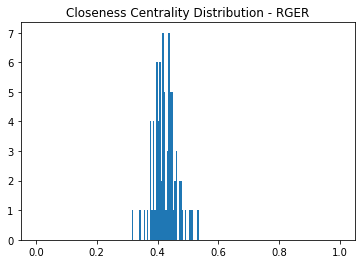

Mean Closeness Centrality for RGER(Normalized): 0.4242297800918761
Variance of Closeness Centrality for RGER(Normalized): 0.0013672367843356472


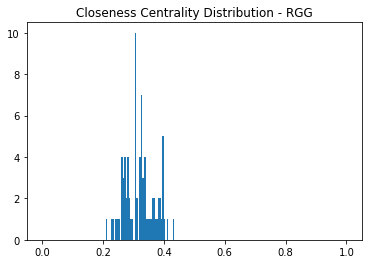

Mean Closeness Centrality for RGG(Normalized): 0.320088016052558
Variance of Closeness Centrality for RGG(Normalized): 0.0023529156049271896


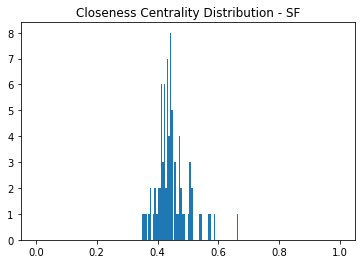

Mean Closeness Centrality for SF(Normalized): 0.4464453837879834
Variance of Closeness Centrality for SF(Normalized): 0.00274403344255402


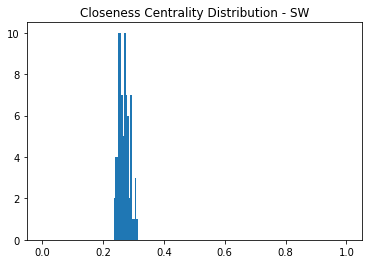

Mean Closeness Centrality for SW(Normalized): 0.26914269896354603
Variance of Closeness Centrality for SW(Normalized): 0.0003201178985869596


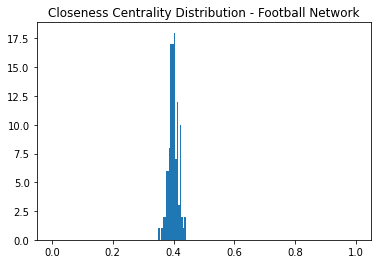

Mean Closeness Centrality for Football Network(Normalized): 0.39931907825186225
Variance of Closeness Centrality for Football Network(Normalized): 0.0002461653416156402


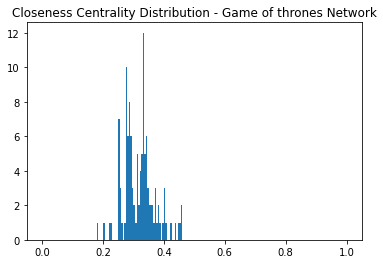

Mean Closeness Centrality for Game of thrones Network(Normalized): 0.31905170483140755
Variance of Closeness Centrality for Game of thrones Network(Normalized): 0.002653087706092289


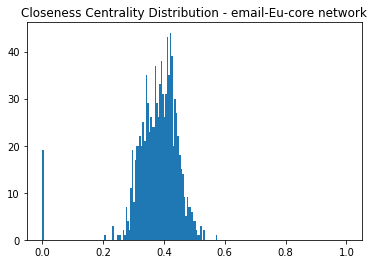

Mean Closeness Centrality for email-Eu-core network(Normalized): 0.37968268365572333
Variance of Closeness Centrality for email-Eu-core network(Normalized): 0.005599254066309499


In [ ]:
def find_closeness(G):
    return nx.closeness_centrality(G)

def closenessInfo(G, _title, _bins):
    # get closeness for G
    closeness = find_closeness(G)
    # create the figure, add title, show plot
    plt.figure()
    plt.title("Closeness Centrality Distribution - " + _title)
    plt.hist(list(closeness.values()), range = (0, 1), bins = _bins)
    plt.show()
    print("Mean Closeness Centrality for " + _title + "(Normalized):", np.mean(np.array(list(closeness.values()))))
    print("Variance of Closeness Centrality for " + _title + "(Normalized):", np.var(np.array(list(closeness.values()))))

#call closenessInfo for all graphs
for (g, name) in graph_pairs:
  closenessInfo(g, name, 200)

##Παρατηρήσεις:##
###**Football:**###


> Ο γράφος οπτικά φαίνεται να είναι πιο κοντά στην τοπολογία RGER,καθώς επίσης και οι μετρικές του degree centrality και του closeness centrality φαίνεται να έχουν κοντινές τιμές με αυτές του σύνθετου γραφήματος RGER.Ώστόσο απο τα αποτελέσματα των μετρικών ο clustering coefficient του γραφήματος είναι πιο κοντά σε αυτόν του Small World.

###**Game of thrones:**###


> Το συγγεκριμένο πραγματικό γράφημα είναι προφανές οτι μοιάζει με το RGG σύνθετο γράφημα.Αρχίκα αυτό παρατηρείται απο την οπτικοποίηση του όπου μοιάζει πάρα πολύ με την οπτικοποποίηση του RGG που παράχθηκε στην προηγούμενη εργαστηριακή άσκηση, και μετέπειτα απο τις τιμές των degree centrality,  closeness centrality και clustering coefficient οι οποίες μοιάζουν πάρα πολυ με αυτές του RGG.


###**Email-Eu-core network:**###


> Το συγγεκριμένο πραγματικό γράφημα φάινεται να μοιάζει περισσότερο με το scale free σύνθετο γράφημα.Αυτό συμπεραίνεται απο το degree centrality και το closeness centrality τα οποία έχουν κοντινές τιμές με το scale free.
Εκτός απο τισ παρόμοιες μετρικές τιμές αυτό συμπεραίνεται και απο την οπτικοποίηση του γραφήματος η οποία μοιάζει με αυτή του SF.Η μόνη μετρική που δεν συμβαδίζει είναι ο clustering coefficient.


<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε τις βιωλιοθήκες <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a> και <a style=text-decoration:none href='https://docs.python.org/3/library/time.html'>time</a> . Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping



<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

colors.remove("black")
colors.remove("b")
colors.remove("darkgray")
colors.remove('m')
colors.remove('k')
colors.remove("darkgrey")

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p>
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
#ksana dimiourgo tin lista me tous grafous alla dinw mia metriki modularity h performance
graphs = [
    ("REG", REG, "modularity"),
    ("REG", REG, "performance"),
    ("RGER", RGER, "modularity"),
    ("RGER", RGER, "performance"),
    ("RGG", RGG, "modularity"),
    ("RGG", RGG, "performance"),
    ("SF", SF, "modularity"),
    ("SF", SF, "performance"),
    ("SW", SW, "modularity"),
    ("SW", SW, "performance"),
    ("football", football, "modularity"),
    ("football", football, "performance"),
    ("got", got, "modularity"),
    ("got", got, "performance"),
    ("eu", eu_subgraph, "modularity"),
    ("eu", eu_subgraph, "performance")
]

In [ ]:
import itertools
from tqdm import tqdm
k = 50

# lists to keep best performance and modularity scores
performanceList = []
modularityList = []

bestCommsNG = {}

def findClusters_NG(G, Gname, metric):
    bestModularity = -1
    bestPerformance = 0

    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) < k, comp)

    for communities in limited:
        if metric == "modularity":
            modularity = nx.algorithms.community.quality.modularity(G, communities)
            if modularity > bestModularity:
                bestModularity = modularity
                bestComm = communities
        else:
            performance = nx.algorithms.community.quality.partition_quality(G, communities)[1]
            if performance > bestPerformance:
                bestPerformance = performance
                bestComm = communities

    bestCommsNG[Gname + " " + metric] = [list(item) for item in bestComm]

    if metric == "modularity":
        modularityList.append(bestModularity)
        print("Best modularity score for " + Gname + " with Newman Girvan algorithm:", bestModularity)
    else:
        performanceList.append(bestPerformance)
        print("Best performance score for " + Gname + " with Newman Girvan algorithm:", bestPerformance)


for (name, g, metric) in tqdm(graphs):
    findClusters_NG(g, name, metric)


  6%|▋         | 1/16 [00:00<00:08,  1.83it/s]

Best modularity score for REG with Newman Girvan algorithm: 0.7249999999999999


 12%|█▎        | 2/16 [00:01<00:07,  1.79it/s]

Best performance score for REG with Newman Girvan algorithm: 0.9696202531645569


 19%|█▉        | 3/16 [00:04<00:24,  1.88s/it]

Best modularity score for RGER with Newman Girvan algorithm: 0.21109444444444445


 25%|██▌       | 4/16 [00:07<00:29,  2.49s/it]

Best performance score for RGER with Newman Girvan algorithm: 0.9215189873417722


 31%|███▏      | 5/16 [00:10<00:27,  2.54s/it]

Best modularity score for RGG with Newman Girvan algorithm: 0.5970493827160495


 38%|███▊      | 6/16 [00:13<00:25,  2.55s/it]

Best performance score for RGG with Newman Girvan algorithm: 0.9291139240506329


 44%|████▍     | 7/16 [00:16<00:25,  2.83s/it]

Best modularity score for SF with Newman Girvan algorithm: 0.13638331024930742


 50%|█████     | 8/16 [00:21<00:28,  3.56s/it]

Best performance score for SF with Newman Girvan algorithm: 0.9174050632911392


 56%|█████▋    | 9/16 [00:22<00:19,  2.72s/it]

Best modularity score for SW with Newman Girvan algorithm: 0.5741015625


 62%|██████▎   | 10/16 [00:23<00:12,  2.14s/it]

Best performance score for SW with Newman Girvan algorithm: 0.9670886075949368


 69%|██████▉   | 11/16 [00:31<00:20,  4.10s/it]

Best modularity score for football with Newman Girvan algorithm: 0.5996290274077957


 75%|███████▌  | 12/16 [00:40<00:21,  5.45s/it]

Best performance score for football with Newman Girvan algorithm: 0.9581998474446987


 81%|████████▏ | 13/16 [00:43<00:14,  4.77s/it]

Best modularity score for got with Newman Girvan algorithm: 0.6681205999387817


 88%|████████▊ | 14/16 [00:46<00:08,  4.28s/it]

Best performance score for got with Newman Girvan algorithm: 0.9641076769690927


 94%|█████████▍| 15/16 [18:06<05:16, 316.31s/it]

Best modularity score for eu with Newman Girvan algorithm: 0.0006218821799455388


100%|██████████| 16/16 [36:33<00:00, 137.09s/it]

Best performance score for eu with Newman Girvan algorithm: 0.13749034709280175


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [ ]:
bestCommsSC = {}

def findClusters_SC(G, Gname, metric):
    # variables to keep modularity, performance
    bestModularity = -1
    bestPerformance = 0
    nodes = list(G.nodes())
    adjacencyMatrix = nx.to_numpy_array(G)
    for i in range(1, k):
        comm = dict()
        sc = SpectralClustering(n_clusters = i, affinity = "precomputed").fit(adjacencyMatrix)
        for x in np.unique(sc.labels_):
            comm[x] = list()
        for x in range(len(sc.labels_)):
            comm[sc.labels_[x]].append(nodes[x])

        if metric == "modularity":
            modularity = nx.algorithms.community.quality.modularity(G, list(comm.values()))
            if (modularity > bestModularity):
                bestModularity = modularity
                bestComm = comm
        else:
            performance = nx.algorithms.community.quality.partition_quality(G, list(comm.values()))[1]
            if (performance > bestPerformance):
                bestPerformance = performance
                bestComm = comm

    bestCommsSC[Gname + " " + metric] = list(bestComm.values())

    if metric == "modularity":
        modularityList.append(bestModularity)
        print("Best modularity score for " + Gname + " with Spectral Clustering algorithm:", bestModularity)
    else:
        performanceList.append(bestPerformance)
        print("Best performance score for " + Gname + " with Spectral Clustering algorithm:", bestPerformance)
for (name, g, metric) in tqdm(graphs):
    findClusters_SC(g, name, metric)

  6%|▋         | 1/16 [00:06<01:35,  6.34s/it]

Best modularity score for REG with Spectral Clustering algorithm: 0.725


 12%|█▎        | 2/16 [00:13<01:31,  6.57s/it]

Best performance score for REG with Spectral Clustering algorithm: 0.9743670886075949


 19%|█▉        | 3/16 [00:18<01:19,  6.15s/it]

Best modularity score for RGER with Spectral Clustering algorithm: 0.2731777777777778


 25%|██▌       | 4/16 [00:22<01:00,  5.05s/it]

Best performance score for RGER with Spectral Clustering algorithm: 0.915506329113924


 31%|███▏      | 5/16 [00:25<00:48,  4.44s/it]

Best modularity score for RGG with Spectral Clustering algorithm: 0.6021827160493828


 38%|███▊      | 6/16 [00:28<00:40,  4.05s/it]

Best performance score for RGG with Spectral Clustering algorithm: 0.9363924050632911


 44%|████▍     | 7/16 [00:32<00:34,  3.84s/it]

Best modularity score for SF with Spectral Clustering algorithm: 0.26802177112188363


 50%|█████     | 8/16 [00:35<00:29,  3.69s/it]

Best performance score for SF with Spectral Clustering algorithm: 0.9136075949367088


 56%|█████▋    | 9/16 [00:38<00:25,  3.59s/it]

Best modularity score for SW with Spectral Clustering algorithm: 0.560234375


 62%|██████▎   | 10/16 [00:42<00:21,  3.51s/it]

Best performance score for SW with Spectral Clustering algorithm: 0.9667721518987342


 69%|██████▉   | 11/16 [00:49<00:22,  4.53s/it]

Best modularity score for football with Spectral Clustering algorithm: 0.6022010863056825


 75%|███████▌  | 12/16 [00:56<00:21,  5.38s/it]

Best performance score for football with Spectral Clustering algorithm: 0.958047292143402


 81%|████████▏ | 13/16 [01:02<00:17,  5.70s/it]

Best modularity score for got with Spectral Clustering algorithm: 0.6654167942046729


 88%|████████▊ | 14/16 [01:09<00:11,  5.85s/it]

Best performance score for got with Spectral Clustering algorithm: 0.9494374020794759


 94%|█████████▍| 15/16 [01:47<00:15, 15.66s/it]

Best modularity score for eu with Spectral Clustering algorithm: 0.3800597302646982


100%|██████████| 16/16 [02:23<00:00,  8.95s/it]

Best performance score for eu with Spectral Clustering algorithm: 0.8542725054313691


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [ ]:
bestCommsMM = {}

def findClusters_MM(G, Gname):
    comp = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, comp)
    performance = nx.algorithms.community.quality.partition_quality(G, comp)[1]
    bestCommsMM[Gname] = [list(item) for item in comp]
    print("Modularity score for " + Gname + " with Modularity Maximization algorithm:", modularity)
    print("Performance score for " + Gname + " with Modularity Maximization algorithm:", performance)
    modularityList.append(modularity)
    performanceList.append(performance)
for (name, g, metric) in tqdm(graphs):
    if metric == "modularity":
        findClusters_MM(g, name)

 44%|████▍     | 7/16 [00:00<00:00, 61.38it/s]

Modularity score for REG with Modularity Maximization algorithm: 0.673125
Performance score for REG with Modularity Maximization algorithm: 0.8006329113924051
Modularity score for RGER with Modularity Maximization algorithm: 0.28364999999999996
Performance score for RGER with Modularity Maximization algorithm: 0.7591772151898735
Modularity score for RGG with Modularity Maximization algorithm: 0.5853728395061728
Performance score for RGG with Modularity Maximization algorithm: 0.8291139240506329
Modularity score for SF with Modularity Maximization algorithm: 0.27000194771468145
Performance score for SF with Modularity Maximization algorithm: 0.7939873417721519
Modularity score for SW with Modularity Maximization algorithm: 0.563203125
Performance score for SW with Modularity Maximization algorithm: 0.9003164556962026
Modularity score for football with Modularity Maximization algorithm: 0.5564043335134086
Performance score for football with Modularity Maximization algorithm: 0.8684973302

 88%|████████▊ | 14/16 [00:00<00:00, 56.44it/s]

Modularity score for got with Modularity Maximization algorithm: 0.660477884909703
Performance score for got with Modularity Maximization algorithm: 0.829796325309785


100%|██████████| 16/16 [00:06<00:00,  2.45it/s]

Modularity score for eu with Modularity Maximization algorithm: 0.3471325650460906
Performance score for eu with Modularity Maximization algorithm: 0.7078716240565892


###Παρουσίαση και σχολιασμός Αποτελεσμάτων:###


#### **Number of Communities in every topology with different metric:**###



In [ ]:
import pandas as pd
print("# of Communities in every topology with different metric")

bestCommsNG_mod_no = [len(v) for (k,v) in bestCommsNG.items() if "modularity" in k]
bestCommsNG_perf_no = [len(v) for (k,v) in bestCommsNG.items() if "performance" in k]
bestCommsSC_mod_no = [len(v) for (k,v) in bestCommsSC.items() if "modularity" in k]
bestCommsSC_perf_no = [len(v) for (k,v) in bestCommsSC.items() if "performance" in k]
bestComms_MM_no = [len(i) for i in list(bestCommsMM.values())]

index = ["Girvan Newman - Modularity", "Girvan Newman - Performance","Spectral Clustering - Modularity", "Spectral Clustering - Performance","Modularity Maximization"]
data = [bestCommsNG_mod_no, bestCommsNG_perf_no, bestCommsSC_mod_no, bestCommsSC_perf_no, bestComms_MM_no]

pd.DataFrame(data, index = index, columns = [graphs[i][0] for i in range(0, len(graphs), 2)])

# of Communities in every topology with different metric


REG  RGER  RGG  SF  SW  football  got  eu
Girvan Newman - Modularity           8    24    5  30   8        10    8   2
Girvan Newman - Performance         16    34   22  43  31        17   49  49
Spectral Clustering - Modularity     7     8    6   4   7        11    7  11
Spectral Clustering - Performance   22    23   10  28  28        16   27  23
Modularity Maximization              4     4    4   5   8         6    5   8

###Σχολιασμός:###


>Η χρήση της μετρικής performace σε συνδιασμό με όποιοδήποτε αλγόρθμο δίνει ως αποτέλεσμα πολύ περισσότερες κοινότητες απότι όποιοσδήποτε άλλος συνδιασμός.


> Σε κανένα απο τους γράφους δεν παίρνουμε παρόμοια αποτελέσματα απο συνδιασμό διαφορετικών μετρικών.Αυτό φαίνεται πολύ ξεκάθαρα στα αποτελέσματα του γράφου eu ώπου οι τιμές έχουν την μεγαλύτερη απόκλιση μεταξύ τους.


> Ο συνδιασμός του αλγορίθμου Spectral Clustering με την μετρική modularity και ο modularity Maximazation είναι οι μόνες 2 περιπτώσεις που το εύρος τιμών των αποτελεσμάτων είναι μικρό.


> Απο τον παρών [σύνδεσμο](https://networkofthrones.wordpress.com/the-series/season-5/)  , γνωρίζουμε ότι ο γράφος της σειράς GOT για την 5η σεζόν έχει 6β κοινότητες, παρόλα αυτα παρατηρούμε ότι κανένας απο τους συνδιασμούς μετρικών δεν είχε αυτό το αποτέλεσμα.Κάποιοιο απτους συνδιασμούσ πλησίασαν την τιμή αλλά δεν μπροούμε να είμαστε σίγουροι ότι συμπεριλαμβάνουν της σωστές κοινότητες.












###**Modularity Score:**###

In [ ]:
print("Modularity Score")

GN_mods = modularityList[0:8]
SC_mods = modularityList[8:16]
MM_mods = modularityList[16:]

index = ["Girvan-Newman", "Spectral Clustering","Modularity Max"]

data = [GN_mods, SC_mods, MM_mods]

pd.DataFrame(data, index = index, columns = [graphs[i][0] for i in range(0, len(graphs), 2)])

Modularity Score


REG      RGER       RGG        SF        SW  \
Girvan-Newman        0.725000  0.211094  0.597049  0.136383  0.574102   
Spectral Clustering  0.725000  0.273178  0.602183  0.268022  0.560234   
Modularity Max       0.673125  0.283650  0.585373  0.270002  0.563203   

                     football       got        eu  
Girvan-Newman        0.599629  0.668121  0.000622  
Spectral Clustering  0.602201  0.665417  0.380060  
Modularity Max       0.556404  0.660478  0.347133

###Σχολιασμός:###

> Δεν παρατηρείται καμία αρνητική τιμή.


> Η τοπολογία SF έχει κατα μέσο όρο τις χειρότερες τιμές σε σχέση μεν τις υπόλοιπες τοπολογίες.


> Την χειρότερη τιμή απο όλα την έχει η τοπολογία EU μεν τον αλγόριθμο Girman Newman.


>Τις καλύτερες επιδόσεις τις έχουν οι Spectral Clustering και Modularity Max σε σύγκριση με τον Girvan Newman.Σε κάποιες περιπτώσεις ο Girvan Newman έχει καλύτερες τιμές αλλά σε γεννικες γραμμές και κατα μέσον όρον οι άλλοι δυο έχουν καλύτερες.



> Όσο αφορά τον χρόνο ο Girvan-Newman χρειάζεται υπερβολικά περισσότερο χρόνο απο τους υπόλοιπους αλγορίθμους. Έτσι δεδομένων και τον πιον πάνω συμπερασμάτων ο περισσότερος χρόνος που χρειάζεται δεν είναι ωφέλιμος.


> Η τοπολογία REG έχει τις μεγαλύτερες τιμές modularity.Πράγμα που είναι λογικό καθώς γνωρίζουμε ότι στην συγγεκριμένγ τοπολογία όλοι  οι κόμβοι έχουν τον ίδιο βαθμό και την ίδια τοπολογία στο δίκτυο,άρα οι διαμερίσεις στο δίκτυο δίνουν σταθερά καλό αποτέλεσμα.


> Η τοπολογία RGG έχει τις δεύτερες καλύτερες τιμές στους συνθετικούς γράφους, κάτι που και πάλι αναμέναμε μιας και η συγγεκριμλενη τοπολογία δημιουργεί απο μόνη της εμφανείς κοινότητες.


> Απο τις παρατηρήσεις και συγγρίσεις που είχαμε κάνει πιο πανω για της πραγματικές τοπολογίες football, got, eu με της σύνθετες τοπολογιες, φαίνεται ότι οι got και eu ήταν συνεπέις με αυτά τα αποτελέσματα καθώς οι τιμές της τοπολογίας got  μοιάζουν μεν τις τιμές της RGG και οι τιμές της τοπολογίας eu μοιάζουν με αυτές της SF.













###**Performance Score:**###

In [ ]:
print("Performance Score")

GN_perf = performanceList[0:8]
SC_perf = performanceList[8:16]
MM_perf = performanceList[16:]

data = [GN_perf, SC_perf, MM_perf]

pd.DataFrame(data, index = index, columns = [graphs[i][0] for i in range(0, len(graphs), 2)])

Performance Score


REG      RGER       RGG        SF        SW  \
Girvan-Newman        0.969620  0.921519  0.929114  0.917405  0.967089   
Spectral Clustering  0.974367  0.915506  0.936392  0.913608  0.966772   
Modularity Max       0.800633  0.759177  0.829114  0.793987  0.900316   

                     football       got        eu  
Girvan-Newman        0.958200  0.964108  0.137490  
Spectral Clustering  0.958047  0.949437  0.854273  
Modularity Max       0.868497  0.829796  0.707872

###Σχολιασμός:###

> Η τοπολογία eu έχει τις χειρότερες τιμές συγκριτικά με τους υπόλοιπους.


> Ο αλγόριθμος Modularity Max φαίνεται να έχει την χειρότερη συμεπριφορά συγκριτικά με τους άλλους αλγορίθμους.


> Ο αλγόριθμος Spectral Clustering φαίνεται να έχει την καλύτερη συμπεριφορά, παρόλον που σε κάποιες περιπτώσεις τπολογιών ο Girvan Newman συμπεριφέρεται  ελαφρώς καλύτερα.Όσο αφορά τον χρόνο ο Spectral Clustering χρειάζεται δραματικά λιγότερο χρόνο απο τον Girvan Newman. Άρα ηξ αναμονή και ο χρόνοςν εκτέλεσης του Girvan Newman, δεν επωφελούν.


> Για την μετρική performance , ο γράφος  RGG φαίνεται να έχει τις καλύτερες επιδόσεις και στους 3 αλγορίθμους, αυτό πιθανός να ωφείλεται στην τοπολογία του γραφήματος η οποία δημιουργεί εμφανείς κοινότητες.


> Επιπρόσθετα παρατηρήτε οτι οι τιμές της τοπολογίας got είναι κοντά στις τιμές τηςν τοπολογίας RGG ,κάτι που κάνει πιον ισχυρή την συσχέτιση που κάναμε το γραφήματος got με το RGG που κάναμε πιο πάνω.















###Οπτικοποίηση Κοινοτήτων:###

In [ ]:
def visualize_community(G, nodes, pos, axis):
    nx.draw_networkx_edges(G, pos = pos, ax = axis, alpha = 0.69)
    for (nodes, i) in zip(nodes, range(len(nodes))):
        n = nx.draw_networkx_nodes(G, pos = pos, node_size = 42, nodelist = nodes, node_color = colors[i], ax = axis)
        n.set_edgecolor("black")
def showPlots(G, Gname):
    # create subplots
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 14))
    fig.suptitle(Gname, fontsize = 42)
    ax = axes.flatten()
    # hide 6th subplot (not needed)
    ax[5].set_visible(False)

    # add title to each subplot
    ax[0].set_title('Newman-Girvan with best modularity score (communities: ' + str(len(bestCommsNG[Gname + " modularity"])) + ')')
    ax[1].set_title('Newman-Girvanwith best performance score (communities: ' + str(len(bestCommsNG[Gname + " performance"])) + ')')
    ax[2].set_title('Spectral Clustering with best modularity score (communities: ' + str(len(bestCommsSC[Gname + " modularity"])) + ')')
    ax[3].set_title('Spectral Clustering with best performance score (communities: ' + str(len(bestCommsSC[Gname + " performance"])) + ')')
    ax[4].set_title('Modularity Max (communities: ' + str(len(bestCommsMM[Gname])) + ')')

    # visualize each community
    visualize_community(G, bestCommsNG[Gname + " modularity"], nx.fruchterman_reingold_layout(G), ax[0])
    visualize_community(G, bestCommsNG[Gname + " performance"], nx.fruchterman_reingold_layout(G), ax[1])
    visualize_community(G, bestCommsSC[Gname + " modularity"], nx.fruchterman_reingold_layout(G), ax[2])
    visualize_community(G, bestCommsSC[Gname + " performance"], nx.fruchterman_reingold_layout(G), ax[3])
    visualize_community(G, bestCommsMM[Gname], nx.fruchterman_reingold_layout(G), ax[4])
    plt.show()

#### Οπτικοποίηση κοινοτήτων American College Football

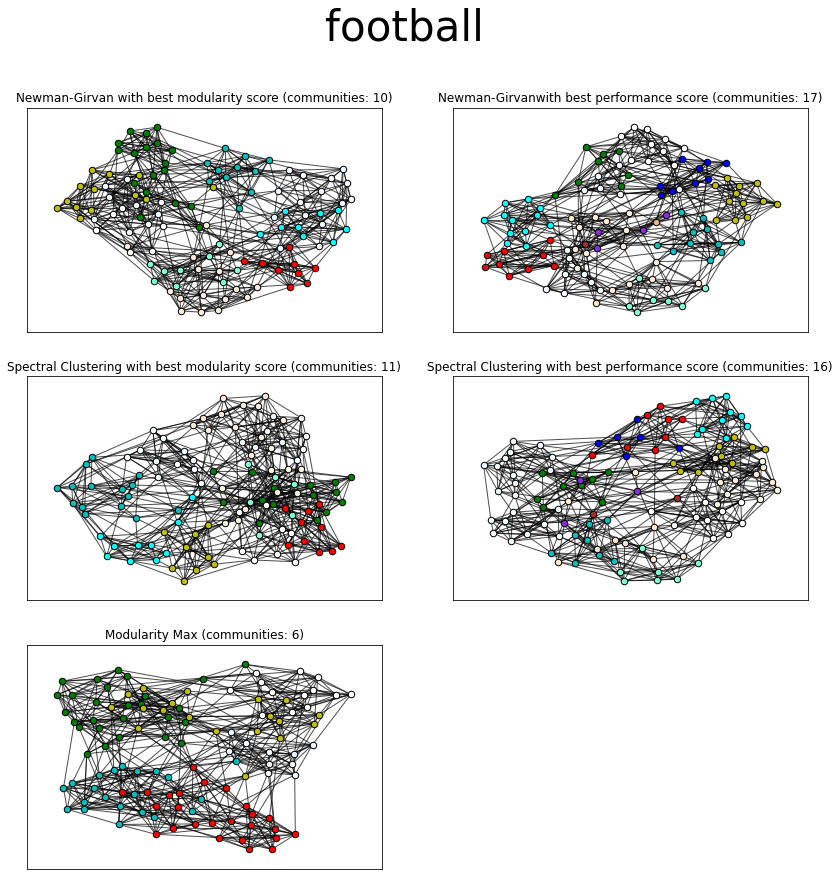

In [ ]:
showPlots(football, "football")

###Σχολιασμός:###



> Απο τη συγγεκριμένη [ιστοσελίδα](http://snap.stanford.edu/agm/?fbclid=IwAR3tBPWGVIXp9ZXuV01NApZfugV7Uz3rpEqpWiNB8ws2LB1Umdj4Orko3lo) γνωρίζουμε οτι ο συγκερκιμένος γράφος έχει 12 κοινότητες. Απο τις οπτικοιποιήσεις παρατηρούμε ότι κανένας απο του αλγορίθμους δεν κατάφερε να βρεί όλες τις κοινότητες.Παρολαν αυτά κάποιες απο τις κοινότητες τις εντόπισαν όλοι οι αλγόριθμοι.Απο τις οπτικοποιήσεις φαίνεται επίσης ότι ο χειρότερος αλγόριθμος ήταν ο Spectral Clustering - performance.


#### Οπτικοποίηση κοινοτήτων Game of Thrones

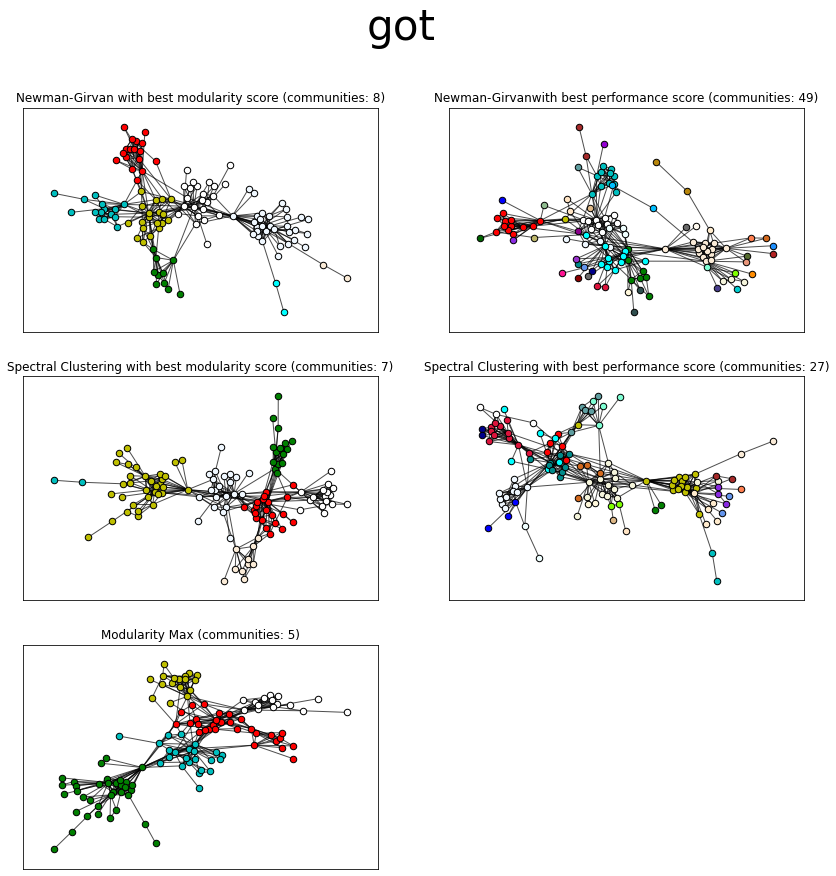

In [ ]:
showPlots(got, "got")

###Σχολιασμός:###


> Οπως αναφέραμεν και πιο πάνω αλλά και όπως φαίνεται απο τον  [σύνδεσμο](https://networkofthrones.wordpress.com/the-series/season-5/) αυτό το γράφημα έχει 6 κοινότητες. Απο τις οπτικοιποιήσεις παρατηρούμε ότι κανένας απο του αλγορίθμους δεν κατάφερε να βρεί όλες τις κοινότητες.Πιο κοντά ήταν ο Modularity Max και ο Spectral Clustering - modularity , οι οποίοι οπτικά φαίνεται να διχωρίζουν τον γράφο σε κοινότητες οι οποίες είναι αποδεκτές, μάλιστα απο την ιστοσελίδα φαίνεται να μοιάζουν αρκετά με τις πραγματικές. Τα χειρότερα αποτελέσματα έχουν οι αλγόριθμοι που χρησιμοποίησαν την μετρική  performance μιας και είχαν  ως αποτέλεσμα πολύ μεγάλο αριθμό κοινοτήτων.



#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

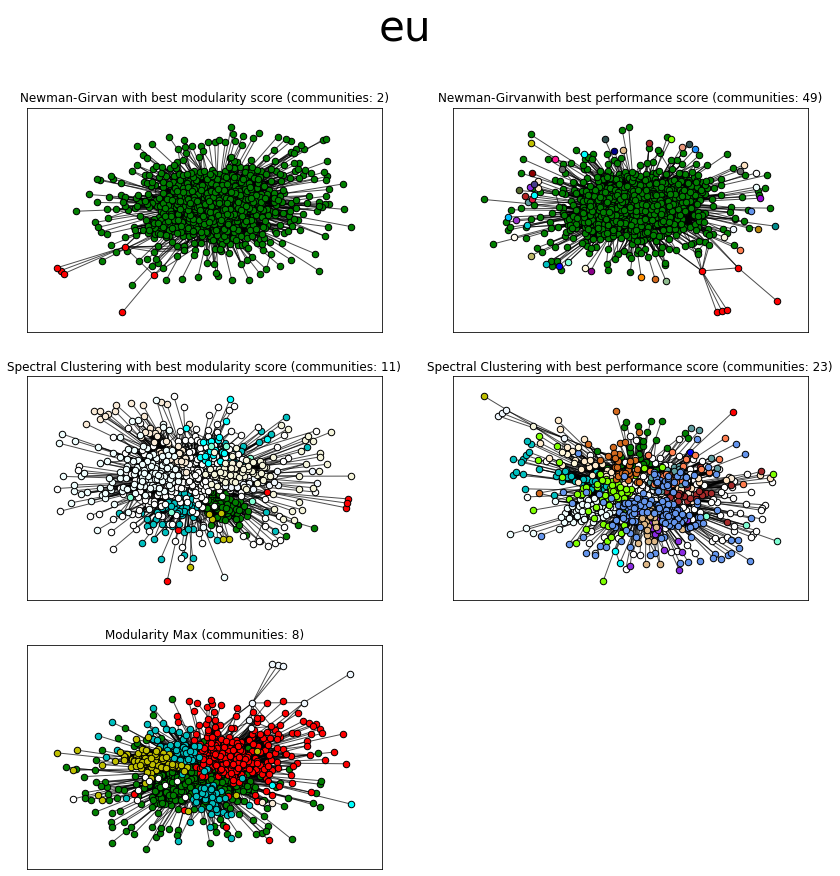

In [ ]:
showPlots(eu_subgraph, "eu")

###Σχολιασμός:###


>Απο την διαμέριση ground truth γνωρίζουμε οτι υπάροχυν 42 κοινότητες για την μεγαλύτερη συνεκτική συνιστώσα του γραφήματος eu.Απο όλουσ τουσ αλγορίθμους ο μόνος που βρίσκεται κοντα είναι ο Spectral Clustering - performance με 43 κοινότητες. Λόγο της τοπολογίας του γραφήματος και ότι όλοι οι κόμβοι βρίσκονται κοντά κοντά στο κέντρο είναι δύσκολο να βρούμε κοινότητες και να κάνουμε παρατηρήσεις. Αν συγκρινουμε τις οπτικοποιήσεις του Spectral Clustering - performance με του  ground truth partition παρατηρούμε ΄λοτι είναι η μόνη περίπτωση που τα αποτελέσματα φαίνονται να είναι αρκετά κοντά.Τα πιον λάθος αποτελέσματα φαίνεται αν τα έχουν οι  Girvan Newman - modularity, Spectral Clustering - modularity και Modularity Max, λόγο του ότι επιστρέφουν πολύ λίγες κοινότητες σε σύγγριση με την ground truth  διαμέριση.



####Ground Truth διαμέριση και οπτικοποίηση της:####


Modularity Score of Ground Truth partition 0.28801318862374214
Performance Score of Ground Truth partition 0.9428136036490563


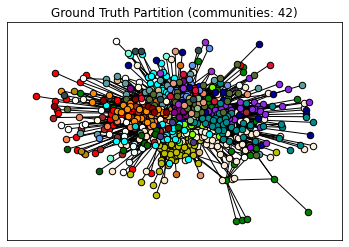

In [ ]:
comms = {}

with open("email-Eu-core-department-labels.txt") as file:
    for l in file:
        x = l.split(' ')
        nodeNumber = str(x[0])
        commNumber = str(x[1])
        if (nodeNumber in eu_subgraph.nodes):
            if (commNumber not in comms.keys()):
                comms[commNumber] = []
            comms[commNumber].append(nodeNumber)

ground_truth_mod = nx.algorithms.community.quality.modularity(eu_subgraph, comms.values())
ground_truth_perf = nx.algorithms.community.quality.partition_quality(eu_subgraph, comms.values())[1]

ground_truth = comms.values()

print("Modularity Score of Ground Truth partition", ground_truth_mod)
print("Performance Score of Ground Truth partition", ground_truth_perf)

plt.title('Ground Truth Partition (communities: ' + str(len(ground_truth)) + ')')
pos = nx.fruchterman_reingold_layout(eu_subgraph)
nx.draw_networkx_edges(eu_subgraph, pos = pos)
for (nodes, i) in zip(ground_truth, range(len(ground_truth))):
    n = nx.draw_networkx_nodes(eu_subgraph, pos = pos, node_size = 42, nodelist = nodes, node_color = colors[i])
    n.set_edgecolor("black")




###Σύγκριση της Ground Truth διαμέρισης με τα αποτελέσματα των αλγορίθμων###

In [ ]:
data = []
data.append([modularityList[7], modularityList[15], modularityList[23], ground_truth_mod])
data.append([performanceList[7], performanceList[15], performanceList[23], ground_truth_perf])
pd.DataFrame(data, index = ["Modularity", "Performance"], columns = ["Girvan-Newman", "Spectral Clustering", "Modularity Max", "Ground Truth"])

Girvan-Newman  Spectral Clustering  Modularity Max  Ground Truth
Modularity        0.000622             0.380060        0.347133      0.288013
Performance       0.137490             0.854273        0.707872      0.942814

###Σχολιασμός:###


> Η ground truth  διαμέριση έχει 42 κοινότητες,απο τα αποτελέσματα φαίνεται ότι κανένας αλγόριθμός δεν είχε ως αυτή την τιμή αποτέλεσμα.


> Στην μετρική  performance κανένας απο τους αλγόριθμους δεν έχει αυτο τον αποτέλεσμα. Η τιμή του performance στον ground truth είναι κοντά στο 95 ενώ όλοι οι αλγόριθμοι έχουθν αποτέλεσμα απο τον 86 και κάτω.


> Στην μετρική  modularity  καλύτερο αποτέλεσμα δίνουν οι αλγόριθμοι Spectral Clustering και Modularity Max.


> Για ακόμη μια φορά ο Girvan Newman δίνει ταν χειρότερα αποτελέσματα σε σχέση μεν τους υπόλοιπους αλγορίθμους.









#### Οπτικοποίηση κοινοτήτων REG

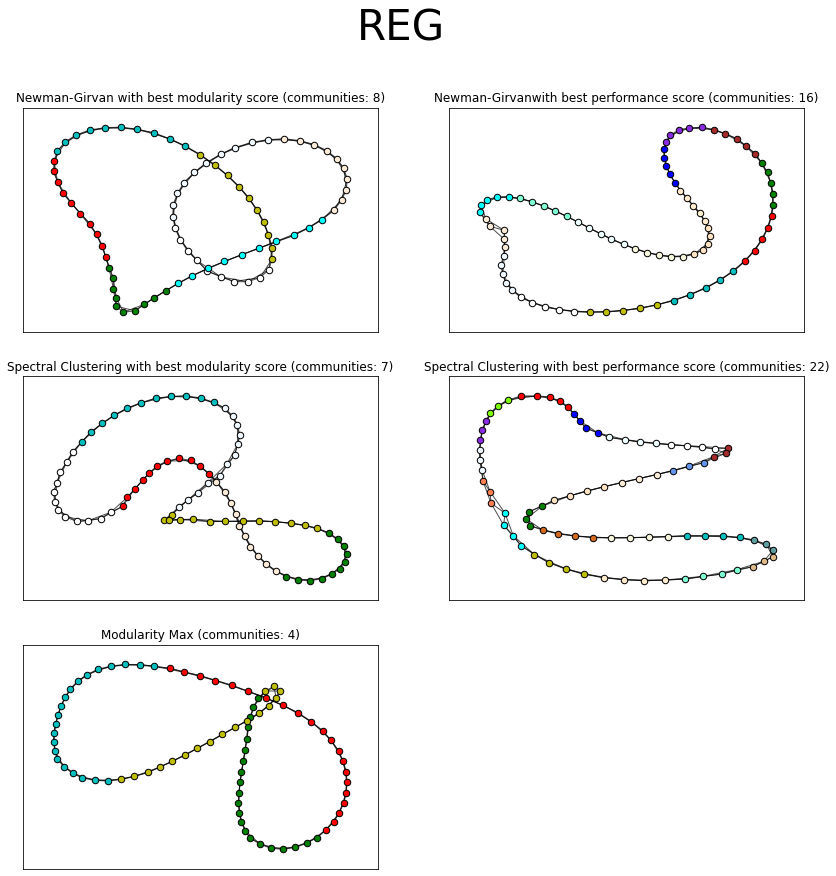

In [ ]:
showPlots(REG, "REG")

###Σχολιασμός:###


> Λόγο του ότι όλοι οι κόμβοι έχουν τον ίδιο βαθμό και την ίδια διάταξη ο ένας  προς τον άλλο αλλά καιλόγο της δύνδεσης τους μεταξύ τους δεν αναμένουμε να σχηματίζονται κοινότητες με κάποιο συγγεκριμένο τρόπο όπως στην RGG. Οι κοινότητες οι οποίες περιέχουν κόμβους οι οποίοι είναι διαδοχικοί θεωρούνται σωστές και έχουυν καλά αποτελέσματα. Απο τις απεικονίσεις φαίνεται ότι όλοι  οι αλγόριθμοι επιστρέφουν κοινότητες με διαδοχικούς κόμβους γιαυτό έχουν και καλά αποτελέσματα στις μετρικές.Παρόλα αυτά καμία κοινότητα δενν έχει ίσο αριθμό κόμβων.



#### Οπτικοποίηση κοινοτήτων RGER

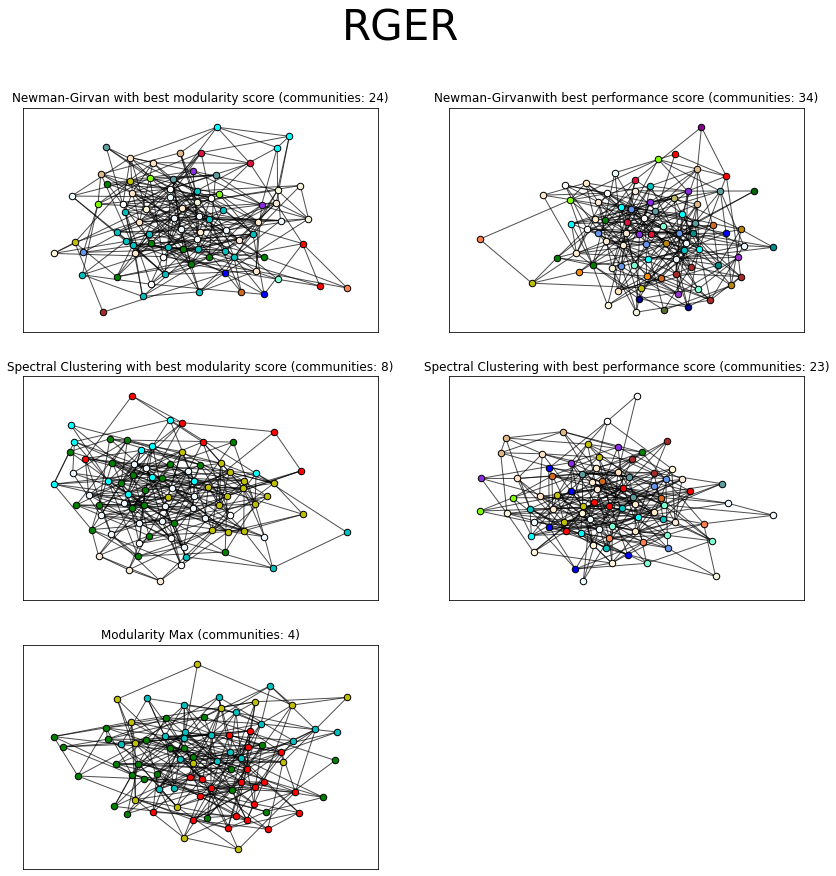

In [ ]:
showPlots(RGER, "RGER")

###Σχολιασμός:###


> Λόγο της τυχαιότητας συνδέσμων του συγγεκριμένου γραφηματος δεν αναμένουμε να σχηματίζονται κοινότητες με κάποιο συγγεκριμένο τρόπο όπως στην RGG.Αυτό καθιστά πολύ δύσκολο το να βρεθούν διακριτές κοινότητες. Απο τις οπτικοιποιήσεις φαίνεται ότι η modularity maximization βρίσκει κα΄ποιες κοινότητες τις οποίες μπορούμε να διακρίνουμε.Αυτο ωφέιλεται στο ότι ο αλγόριθμος είναι greedy , οπόττε αρχικά έχει όλουσ τους κόμβους σε ξεχωριστή κοινότητα και στην συνέχεια προσπαθέι να τους προσθέσει σε κοινή με κριτήριο να αυξηθεί το modularity.  



#### Οπτικοποίηση κοινοτήτων RGG

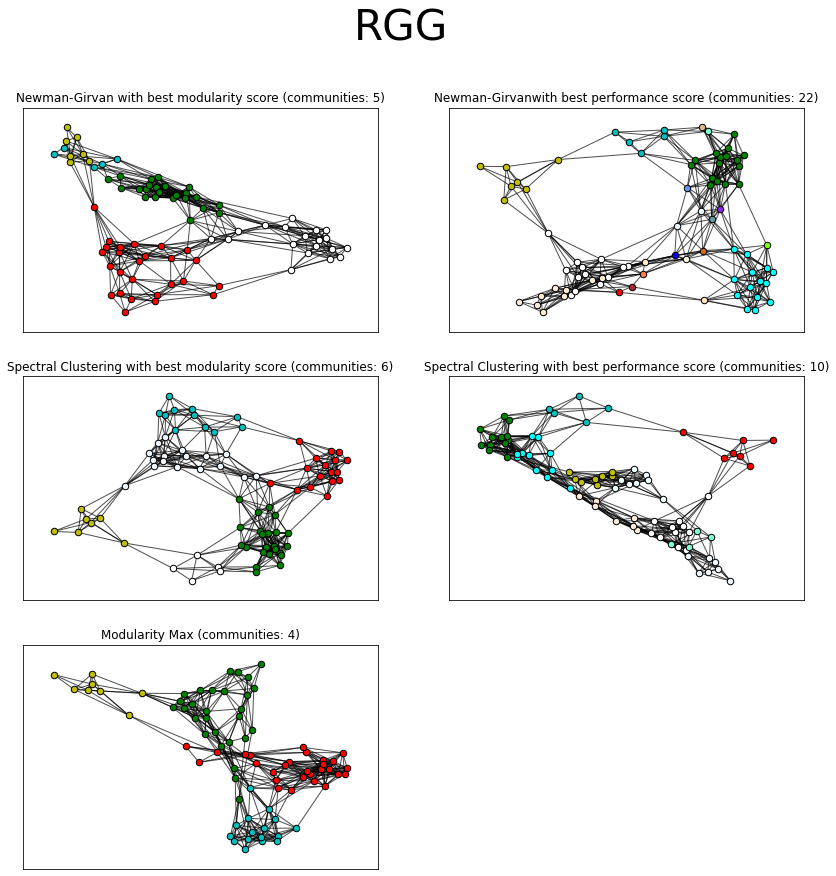

In [ ]:
showPlots(RGG, "RGG")

###Σχολιασμός:###


> Σε αυτή την τοπολογία λόγο τουβ ότι οι κόμβοιν συνδέονται μόνο μεν όσους είναι γύρω τους περιμένουμε να έχουμε κοινότητες.Απο τις τοπολογίες αυτό φαίνεται ξεκάθαρα αφου σε όλους τους αλγορίθμους εξερώντας τον  Girvan Newman - performance το αποτέλεσμα δίνει ορθές κοινότητες.Επίσης οι αλγόριθμοι οι οποιοι έχουν σωστά αποτελέσματα φαίνεται να συμφωνούν σε κάποιες απο τις κοινώτητες.Καλύτερ λειτουργία και αποτελέσματα φαίνεται αν έχουν οι αλγόριθμοι Modularity Max & Girvan Newman - modularity.



#### Οπτικοποίηση κοινοτήτων SW

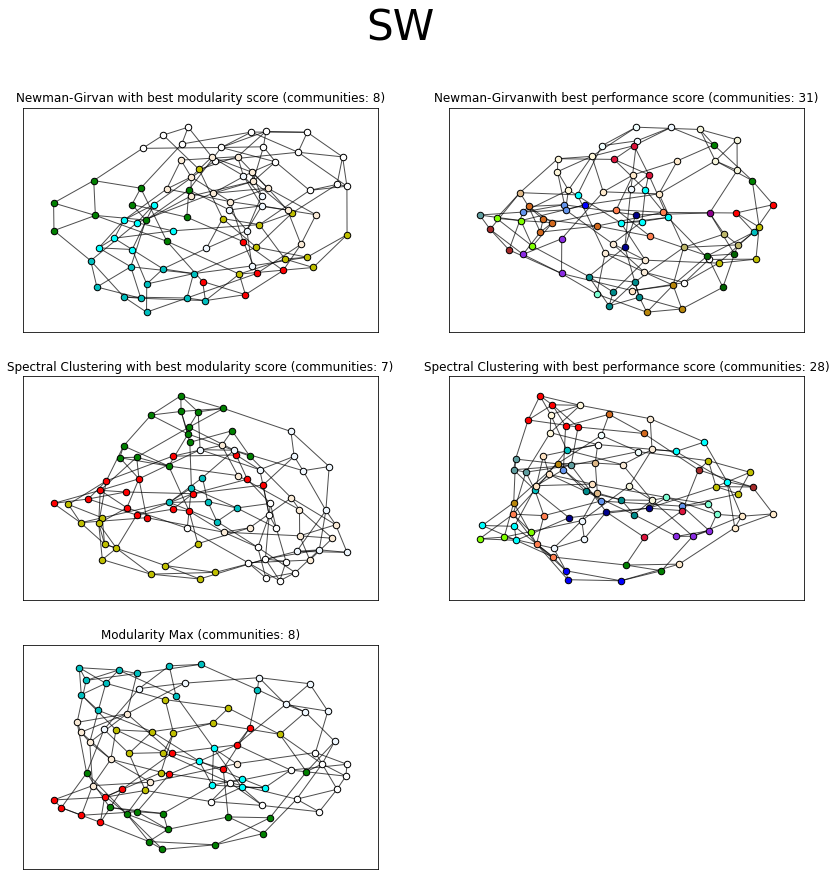

In [ ]:
showPlots(SW, "SW")

###Σχολιασμός:###


> Σε αυτή την τοπολογία αναμένουμε να δημιουργηθούν κοινότητες γύρω απο τους κόμβους με μεγάλο βαθμό. Απο την οπτικοιποίηση αυτό παρατηρείται στους αλγόριθμους που δεν βρήκαν κοινότητες βάση το καλύτερο performance.



#### Οπτικοποίηση κοινοτήτων SF

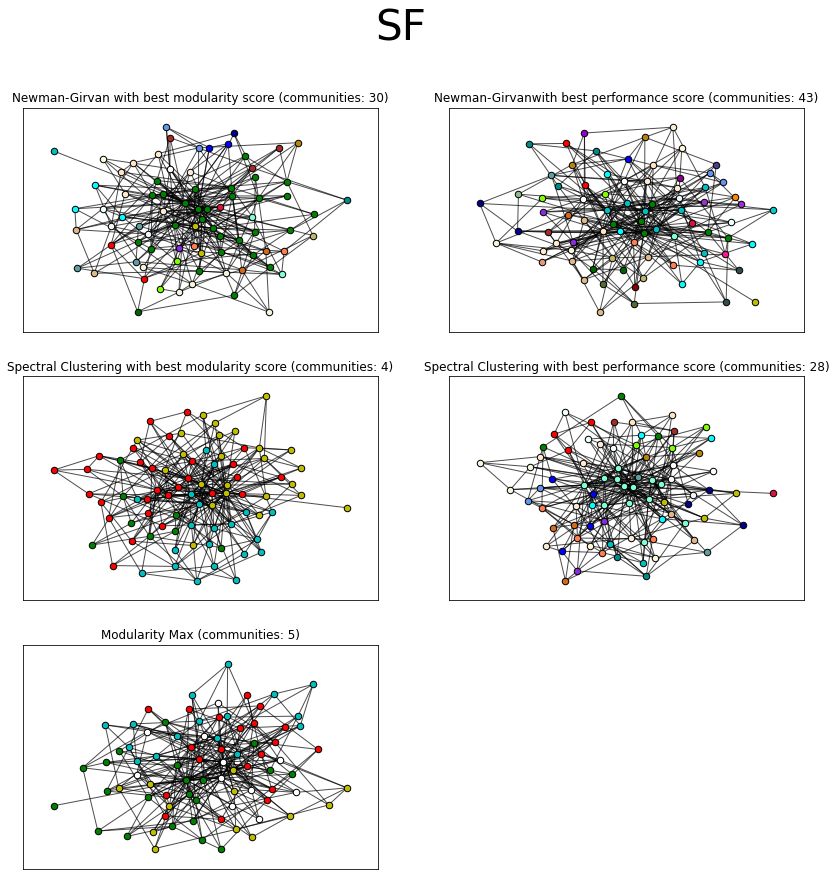

In [ ]:
showPlots(SF, "SF")

###Σχολιασμός:###


> Σε αυτή την τοπολογία αναμένουμε να δημιουργηθούν κοινότητες γύρω απο τους κόμβους με μεγάλο βαθμό,όπως είδαμε και πιο πάνω στο small world.Απον τις οπτικοποιήσεις μας όμως παρατηρούμε ότι όσοι αλγόριθμοι χρησιμοποίησαν την μετρική perfromance όπως και ο Girvan Newman-Modularity  δεν πέτυχαν τόσο τον στόχο όσο οι υπόλοιποι. Αντιθέτως οι Modularity Max & Spectral Clustering - modularity εντόπισαν αποδεκτές κοινότητες.
